# Food 201 Segmentation Task

This notebook filters data for the Food 201 dataset from the broader Food 101 dataset that contains just labels.

Get the dataset from `https://storage.googleapis.com/food201/
food201.zip` and unzip it.

After running it the data will be in following folders:

- `segmented_test` + `segmented_train`: 9654
- `masks_test` + `masks_train`: 2439

Labels are stored in Jupyter variables:

- `df_test` + `df_train`

Each image contains up to 6 labels (one of them is the original Food 101 label).
There is total of 201 labels.


In [123]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import PIL

In [3]:
import os
import pathlib
from collections import defaultdict

In [4]:
DATA_FOLDER = "../food201/"
FOOD_101_FOLDER = "../food-101/images/"

In [5]:
def dataset_stats(df):
    print('Dataset shape: ', df.shape)
    print('Columns: ', df.columns)
    print('Head: \n', df.head())

In [8]:
def extract_segmented_pictures(df, dataset_type):
    """
    Copies the 10_000 segmented images from Food101 that contains total > 100_000 pictures.
    """
    image_folder = f"{DATA_FOLDER}images_{dataset_type}/"
    total = df.shape[0]
    print("================== START ==================")
    for i in range(total):
        filename = df.loc[i, "file"]
        food_folder = filename.split('/')[0]
        if not os.path.exists(image_folder + food_folder):
            os.makedirs(image_folder + food_folder)
        try:
            os.rename(FOOD_101_FOLDER + filename, image_folder + filename)
        except:
            print(f"Could not copy file: {filename}")
        if i % 1000 == 0:
            print(f"Copied {i} / {total} files")

    print("================== DONE ==================")

In [9]:
def prepare_image_dataset(dataset_type):
    """
    Parses and finds images for given `dataset_type`: {test, train}.
    """
    df = pd.read_csv(DATA_FOLDER + dataset_type + "_multilabel.csv", header=None, names=['all'])

    dataset_stats(df)

    df['file'] = df['all'].apply(lambda x: x.split(' ')[0])
    df['ids'] = df['all'].apply(lambda x: x.split(' ')[1:])
    df.drop(columns=["all"], inplace=True)
    dataset_stats(df)
    
    # DONE ALREADY
    # extract_segmented_pictures(df, dataset_type)
    return df

## Labels

In [29]:
df_labels = pd.read_csv(DATA_FOLDER + "multilabel_map.csv", header=None, names=["id", "food"])

In [30]:
dataset_stats(df_labels)

Dataset shape:  (201, 2)
Columns:  Index(['id', 'food'], dtype='object')
Head: 
    id       food
0   0  apple pie
1   1    arugula
2   2  asparagus
3   3     au jus
4   4    avocado


In [31]:
MAX_ID = df_labels["id"].max()
MAX_ID

200

## Train / test images labels

In [124]:
df_train = prepare_image_dataset('train')

Dataset shape:  (35242, 1)
Columns:  Index(['all'], dtype='object')
Head: 
                                 all
0          omelette/3532836.jpg 134
1  frozen_yogurt/3667619.jpg 88 183
2            paella/3673967.jpg 140
3   baby_back_ribs/3781340.jpg 5 69
4         creme_brulee/82255.jpg 63
Dataset shape:  (35242, 2)
Columns:  Index(['file', 'ids'], dtype='object')
Head: 
                          file        ids
0        omelette/3532836.jpg      [134]
1   frozen_yogurt/3667619.jpg  [88, 183]
2          paella/3673967.jpg      [140]
3  baby_back_ribs/3781340.jpg    [5, 69]
4      creme_brulee/82255.jpg       [63]


In [125]:
df_test = prepare_image_dataset('test')

Dataset shape:  (15132, 1)
Columns:  Index(['all'], dtype='object')
Head: 
                                        all
0  strawberry_shortcake/837744.jpg 184 199
1      pork_chop/540470.jpg 163 193 152 66
2              clam_chowder/2762472.jpg 54
3           baby_back_ribs/543585.jpg 5 81
4     lobster_roll_sandwich/670381.jpg 118
Dataset shape:  (15132, 2)
Columns:  Index(['file', 'ids'], dtype='object')
Head: 
                                file                  ids
0   strawberry_shortcake/837744.jpg           [184, 199]
1              pork_chop/540470.jpg  [163, 193, 152, 66]
2          clam_chowder/2762472.jpg                 [54]
3         baby_back_ribs/543585.jpg              [5, 81]
4  lobster_roll_sandwich/670381.jpg                [118]


In [126]:
test_images_dir = pathlib.Path(DATA_FOLDER + 'images_test/')
train_images_dir = pathlib.Path(DATA_FOLDER + 'images_train/')

In [127]:
train_count = len(list(train_images_dir.glob('*/*.jpg')))
print(f'Train images: {train_count}')

test_count = len(list(test_images_dir.glob('*/*.jpg')))
print(f'Test images: {test_count}')

Train images: 25587
Test images: 12693


In [128]:
test_image_sizes = defaultdict(int)

for img in test_images_dir.glob('*/*.jpg'):
    image = PIL.Image.open(str(img))
    test_image_sizes[image.size] += 1

train_image_sizes = defaultdict(int)

for img in train_images_dir.glob('*/*.jpg'):
    image = PIL.Image.open(str(img))
    train_image_sizes[image.size] += 1

In [129]:
for size, count in sorted(test_image_sizes.items(), key=lambda x: x[1], reverse=True):
    if count < 10:
        break
    print(f"Size {size} {count}")
    

Size (512, 512) 7904
Size (512, 384) 1870
Size (384, 512) 848
Size (382, 512) 345
Size (512, 382) 322
Size (512, 341) 174
Size (512, 288) 126
Size (512, 306) 104
Size (512, 289) 101
Size (512, 383) 73
Size (306, 512) 57
Size (511, 512) 45
Size (512, 342) 45
Size (288, 512) 44
Size (512, 340) 44
Size (512, 307) 39
Size (289, 512) 34
Size (383, 512) 33
Size (512, 287) 32
Size (512, 511) 29
Size (512, 343) 25
Size (341, 512) 22
Size (512, 339) 18
Size (287, 512) 14
Size (512, 385) 14


In [130]:
for size, count in sorted(train_image_sizes.items(), key=lambda x: x[1], reverse=True):
    if count < 10:
        break
    print(f"Size {size} {count}")

Size (512, 512) 15745
Size (512, 384) 3767
Size (384, 512) 1703
Size (382, 512) 667
Size (512, 382) 663
Size (512, 341) 333
Size (512, 306) 261
Size (512, 288) 253
Size (512, 289) 189
Size (512, 383) 168
Size (306, 512) 121
Size (511, 512) 117
Size (512, 340) 111
Size (512, 307) 86
Size (512, 342) 85
Size (288, 512) 85
Size (383, 512) 85
Size (341, 512) 77
Size (512, 511) 68
Size (512, 287) 67
Size (289, 512) 54
Size (512, 343) 47
Size (512, 339) 42
Size (307, 512) 30
Size (512, 385) 26
Size (512, 509) 24
Size (512, 308) 16
Size (287, 512) 16
Size (512, 508) 15
Size (512, 500) 15
Size (512, 471) 14
Size (512, 386) 13
Size (512, 366) 12
Size (342, 512) 11
Size (512, 510) 11
Size (512, 304) 10


## Keep segmented only

In [131]:
def extract_masks(df, dataset_type):
    """
    Split the masks into train / test sets and removes any image without mask.
    """
    mask_folder = f"{DATA_FOLDER}masks_{dataset_type}/"

    total = df.shape[0]
    print("================== START ==================")
    for i in range(total):
        filename = df.loc[i, "file"]
        food_folder = filename.split('/')[0]
        filename_png = filename.split('.')[0] + '.png'

        if not os.path.exists(mask_folder + food_folder):
            os.makedirs(mask_folder + food_folder)
        try:
            os.rename(DATA_FOLDER + 'pixel_annotations/' + filename_png, mask_folder + filename_png)
        except:
            print(f"Could not find mask for file: {filename}")
        if i % 1000 == 0:
            print(f"Copied {i} / {total} files")

    print("================== DONE ==================")

In [132]:
# extract_masks(df_test, 'test')

In [133]:
# extract_masks(df_train, 'train')

In [134]:
test_masks = pathlib.Path(DATA_FOLDER + 'masks_test/')
train_masks = pathlib.Path(DATA_FOLDER + 'masks_train/')

In [135]:
print(f"Tests images with mask: {len(list(test_masks.glob('*/*.png')))}")
print(f"Train images with mask: {len(list(train_masks.glob('*/*.png')))}")


Tests images with mask: 2439
Train images with mask: 9654


In [136]:
def extract_segmented(dataset_type):
    """
    Removes all test / train images without a mask.
    """
    mask_folder = pathlib.Path(f"{DATA_FOLDER}masks_{dataset_type}/")
    image_folder = pathlib.Path(f"{DATA_FOLDER}images_{dataset_type}")
    new_image_folder = pathlib.Path(f"{DATA_FOLDER}segmented_{dataset_type}")

    removed = 0
    total = 0

    print("================== START ==================")
    for mask in mask_folder.glob('*/*'):
        # Map to jpeg file.
        filefolder = str(mask).split('\\')[-2]
        filename = filefolder + '\\' + str(mask).split('\\')[-1].split('.')[0] + '.jpg'
        filepath = image_folder / filename
        newpath = new_image_folder / filename

        if not os.path.exists(new_image_folder / filefolder):
            os.makedirs(new_image_folder / filefolder)

        os.replace(filepath, newpath)
        total += 1
    
    print(f"Removed {total} files")
    print("================== DONE ==================")

In [137]:
# extract_segmented('test')

In [138]:
# extract_segmented('train')

In [139]:
test_s = pathlib.Path(DATA_FOLDER + 'segmented_test/')
train_s = pathlib.Path(DATA_FOLDER + 'segmented_train/')

print(f"Tests images with mask: {len(list(test_s.glob('*/*.jpg')))}")
print(f"Train images with mask: {len(list(train_s.glob('*/*.jpg')))}")

Tests images with mask: 2439
Train images with mask: 9654


### Remove from labels datasets extraneous entries

In [140]:
df_test["present"] = False
df_train["present"] = False

In [141]:
def remove_unused_entries(df, dataset_type):
    """
    Removes all entries that don't have segmented image.
    """
    segmented_folder = pathlib.Path(f"{DATA_FOLDER}segmented_{dataset_type}")

    for image in segmented_folder.glob('*/*'):
        filename = ('/').join(str(image).split('\\')[-2:])
        df.loc[df['file'] == filename, 'present'] = True

In [142]:
remove_unused_entries(df_test, 'test')

In [143]:
df_test['present'].value_counts()

False    12693
True      2439
Name: present, dtype: int64

In [144]:
remove_unused_entries(df_train, 'train')

In [145]:
df_train['present'].value_counts()

False    25588
True      9654
Name: present, dtype: int64

In [146]:
df_test = df_test[df_test["present"] == True]
df_test.drop(columns=["present"], inplace=True)
df_test.shape

(2439, 2)

In [147]:
df_train = df_train[df_train["present"] == True]
df_train.drop(columns=["present"], inplace=True)
df_train.shape

(9654, 2)

In [150]:
df_train_stored = df_train
df_test_stored = df_test

%store df_train_stored
%store df_test_stored

Stored 'df_train_stored' (DataFrame)
Stored 'df_test_stored' (DataFrame)


In [151]:
df_train.to_csv('train_images_101_labels.csv')
df_test.to_csv('test_images_101_labels.csv')

## Stats for Food 201 dataset

In [46]:
test_image_sizes = defaultdict(int)

for img in test_s.glob('*/*.jpg'):
    image = PIL.Image.open(str(img))
    test_image_sizes[image.size] += 1

train_image_sizes = defaultdict(int)

for img in train_s.glob('*/*.jpg'):
    image = PIL.Image.open(str(img))
    train_image_sizes[image.size] += 1

In [47]:
for size, count in sorted(test_image_sizes.items(), key=lambda x: x[1], reverse=True):
    if count < 10:
        break
    print(f"Size {size} {count}")

Size (512, 512) 1514
Size (512, 384) 365
Size (384, 512) 173
Size (382, 512) 66
Size (512, 382) 61
Size (512, 288) 27
Size (512, 341) 26
Size (512, 306) 22
Size (512, 289) 20
Size (306, 512) 14
Size (512, 342) 11


In [48]:
for size, count in sorted(train_image_sizes.items(), key=lambda x: x[1], reverse=True):
    if count < 10:
        break
    print(f"Size {size} {count}")

Size (512, 512) 5969
Size (512, 384) 1397
Size (384, 512) 634
Size (382, 512) 258
Size (512, 382) 249
Size (512, 341) 151
Size (512, 288) 112
Size (512, 289) 92
Size (512, 306) 84
Size (512, 383) 46
Size (306, 512) 46
Size (512, 340) 43
Size (512, 307) 40
Size (511, 512) 39
Size (288, 512) 34
Size (512, 342) 31
Size (383, 512) 26
Size (512, 287) 22
Size (289, 512) 21
Size (341, 512) 20
Size (512, 509) 17
Size (307, 512) 17
Size (512, 511) 17
Size (512, 339) 14
Size (512, 343) 12


In [117]:
def food_frequency(df):
    food_ids = np.concatenate(df["ids"].values)
    food_ids_u, food_ids_c = np.unique(food_ids, return_counts=True)
    foods = []

    food_ids_u, food_ids_c = zip(*sorted(zip(food_ids_u, food_ids_c), key=lambda x: x[1]))

    for food_id, count in zip(food_ids_u, food_ids_c):
        food = df_labels.loc[int(food_id), "food"]
        foods.append(food)

        print(f"[{food_id:>3}] {food:25} {count}")

    # fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,100))
    # ax.barh(y=range(len(foods)), width=food_ids_c, tick_label=foods, align='center', color=['y', 'b'])

In [119]:
food_frequency(df_train)

[ 20] black beans               15
[ 28] bun                       15
[  3] au jus                    15
[192] tomato sauce              17
[ 53] cilantro                  19
[125] mixed greens              21
[129] mustard                   21
[ 21] blackberries              21
[200] wine                      22
[ 48] chocolate                 22
[ 65] croutons                  22
[170] sausage                   23
[ 87] frosting                  23
[ 47] chives                    24
[ 91] ginger                    24
[143] parmesan cheese           25
[ 15] beer                      25
[ 18] berries                   25
[147] peppers                   26
[ 43] chicken                   26
[175] soup                      27
[194] tortilla                  27
[  9] basil                     27
[103] ham                       28
[ 32] cake                      28
[ 30] cabbage                   30
[ 56] cocktail sauce            30
[ 62] cream                     30
[  1] arugula       

In [118]:
food_frequency(df_test)

[ 18] berries                   3
[  3] au jus                    3
[ 30] cabbage                   3
[ 32] cake                      3
[ 20] black beans               4
[ 87] frosting                  4
[ 90] garnish                   4
[ 12] beef                      5
[127] mushrooms                 5
[131] noodles                   5
[147] peppers                   5
[ 48] chocolate                 5
[ 91] ginger                    5
[ 56] cocktail sauce            6
[ 93] grapes                    6
[ 11] beans                     7
[132] nuts                      7
[175] soup                      7
[200] wine                      7
[ 43] chicken                   7
[ 53] cilantro                  7
[ 85] fried egg                 7
[122] mint                      8
[ 21] blackberries              8
[  4] avocado                   8
[145] peas                      9
[170] sausage                   9
[194] tortilla                  9
[ 47] chives                    9
[ 62] cream   

In [120]:
food_ids_test = np.concatenate(df_test["ids"].values)
food_ids_test_u, food_ids_test_c = np.unique(food_ids_test, return_counts=True)

food_ids_train = np.concatenate(df_train["ids"].values)
food_ids_train_u, food_ids_train_c = np.unique(food_ids_train, return_counts=True)

food_ids_test_u, food_ids_test_c = zip(*sorted(zip(food_ids_test_u, food_ids_test_c), key=lambda x: x[0]))
food_ids_train_u, food_ids_train_c = zip(*sorted(zip(food_ids_train_u, food_ids_train_c), key=lambda x: x[0]))

food_id = 0
index_test = 0
index_train = 0

abundancy_ratios = []

while food_id <= MAX_ID:

    id_train = food_ids_train_u[index_train]
    id_test = food_ids_test_u[index_test]

    food = df_labels.loc[int(food_id), "food"]

    if id_train == id_test:
        count_train = food_ids_train_c[index_train]
        count_test = food_ids_test_c[index_test]

        ratio = count_train / count_test
        abundancy_ratios.append(ratio)

        print(f"[{food_id:>3}] {food:25} {count_train:4d} {count_train / df_train.shape[0]:.2f} {count_test:4d} {count_test / df_test.shape[0]:.2f}  {ratio:.2f}")
        index_train += 1
        index_test += 1

    elif id_train > id_test:
        print(f"[{food_id:>3}] {food:25} {count_test:4d} ONLY IN TEST SET")
        index_test += 1
    elif id_train < id_test:
        print(f"[{food_id:>3}] {food:25} {count_train:4d} ONLY IN TRAIN SET")
        index_train += 1

    food_id += 1   

[  0] apple pie                  108 0.01   28 0.01  3.86
[  1] arugula                     31 0.00   14 0.01  2.21
[  2] asparagus                   54 0.01   16 0.01  3.38
[  3] au jus                     107 0.01   22 0.01  4.86
[  4] avocado                    189 0.02   52 0.02  3.63
[  5] baby back ribs             100 0.01   32 0.01  3.12
[  6] bacon                       28 0.00   17 0.01  1.65
[  7] baked potato               113 0.01   29 0.01  3.90
[  8] baklava                     53 0.01   11 0.00  4.82
[  9] basil                       41 0.00   14 0.01  2.93
[ 10] bean sprouts               104 0.01   28 0.01  3.71
[ 11] beans                       96 0.01   29 0.01  3.31
[ 12] beef                        84 0.01   28 0.01  3.00
[ 13] beef carpaccio              45 0.00    7 0.00  6.43
[ 14] beef tartare               100 0.01   25 0.01  4.00
[ 15] beer                       226 0.02   48 0.02  4.71
[ 16] beet salad                 120 0.01   35 0.01  3.43
[ 17] beignets

(array([ 3.,  2.,  1.,  1.,  3.,  4.,  6.,  4., 10.,  8.,  9., 21., 11.,
        15., 14., 14.,  7., 10.,  5.,  6., 12.,  2.,  3.,  3.,  6.,  2.,
         6.,  0.,  2.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  1.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  1.]),
 array([ 1.5 ,  1.67,  1.84,  2.01,  2.18,  2.35,  2.52,  2.69,  2.86,
         3.03,  3.2 ,  3.37,  3.54,  3.71,  3.88,  4.05,  4.22,  4.39,
         4.56,  4.73,  4.9 ,  5.07,  5.24,  5.41,  5.58,  5.75,  5.92,
         6.09,  6.26,  6.43,  6.6 ,  6.77,  6.94,  7.11,  7.28,  7.45,
         7.62,  7.79,  7.96,  8.13,  8.3 ,  8.47,  8.64,  8.81,  8.98,
         9.15,  9.32,  9.49,  9.66,  9.83, 10.  ]),
 <a list of 50 Patch objects>)

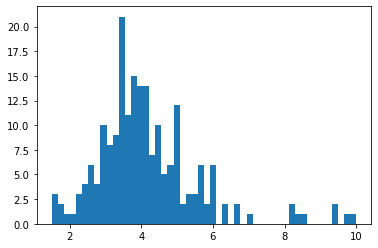

In [121]:
plt.hist(abundancy_ratios, bins=50)